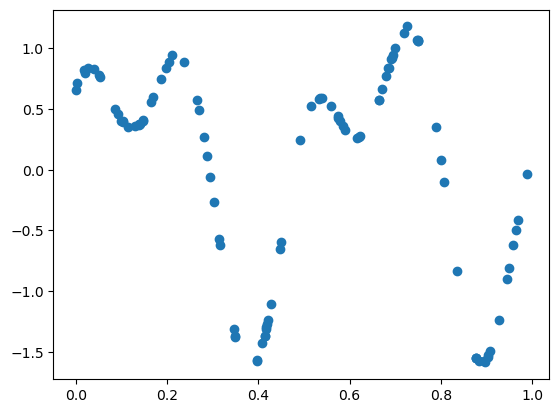

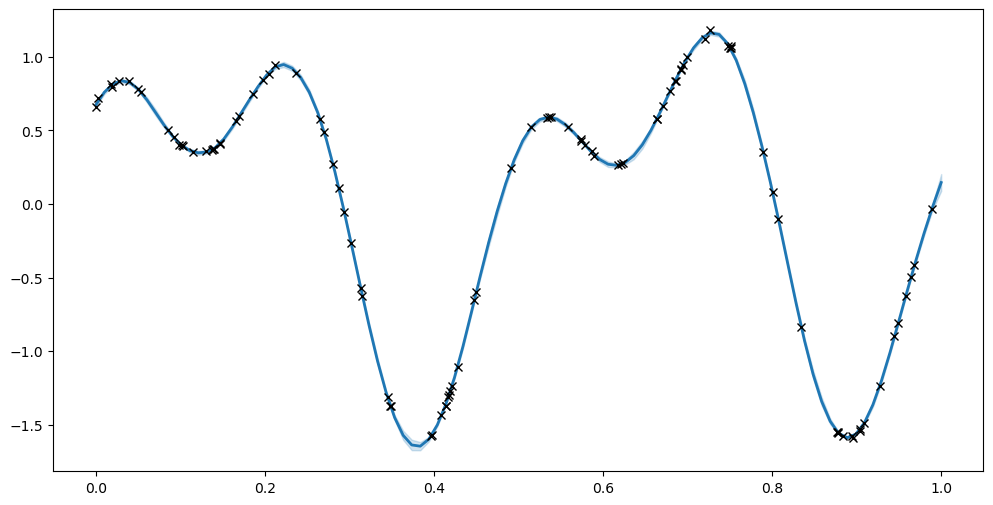

In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data
np.random.seed(1)
X = np.random.rand(100, 1)
Y = np.sin(12 * X) + 0.66 * np.cos(25 * X) + np.random.randn(100, 1) * 0.01

# plot the data
plt.scatter(X, Y)
plt.show()

# build the GP regression model
kernel = gpflow.kernels.Matern52(variance=1.)
model = gpflow.models.GPR(data=(X, Y), kernel=kernel, mean_function=None)

# optimize the model parameters
optimizer = gpflow.optimizers.Scipy()
optimizer.minimize(model.training_loss, model.trainable_variables)

# generate test points for prediction
xx = np.linspace(0, 1, 100).reshape(100, 1)  # test points must be of shape (N, D)

# predict mean and variance of latent GP at test points
mean, var = model.predict_f(xx)

# plot
plt.figure(figsize=(12, 6))
plt.plot(xx, mean, 'C0', lw=2)
plt.fill_between(xx[:,0],
                 mean[:,0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:,0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)
plt.plot(X, Y, 'kx')
plt.show()


In [ ]:
import gpflow
from gpflow import kullback_leiblers, features
import tensorflow as tf

class MyKernel(gpflow.kernels.Kernel):
    def __init__(self, variance=1.0, lengthscales=1.0, **kwargs):
        super().__init__(**kwargs)
        self.variance = gpflow.Parameter(variance, transform=positive())
        self.lengthscales = gpflow.Parameter(lengthscales, transform=positive())

    def K(self, X, X2=None, presliced=False):
        if not presliced:
            X, X2 = self.slice(X, X2)
        return self.variance * tf.math.exp(-0.5 * self.square_dist(X, X2) / self.lengthscales**2)
    
    def K_diag(self, X, presliced=False):
        return tf.fill(tf.shape(X)[:-1], tf.squeeze(self.variance))

